In [2]:
#Load the datset
from sklearn.datasets import fetch_california_housing
import pandas as pd

california=fetch_california_housing(as_frame=True)

# Convert to DataFrame
df = california.frame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
# basic info about data and NULL checking
df.info()
df.isnull().sum()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


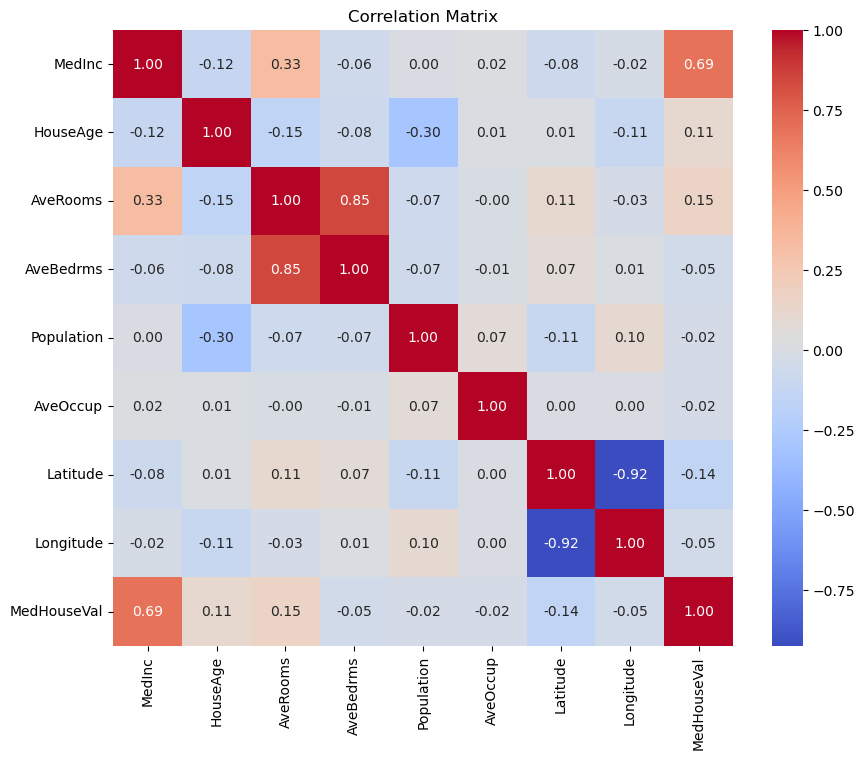

In [4]:
#visualzing the corrrelation matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df.select_dtypes(include='number').corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


In [5]:
#MedInc is strongly correlated with house value

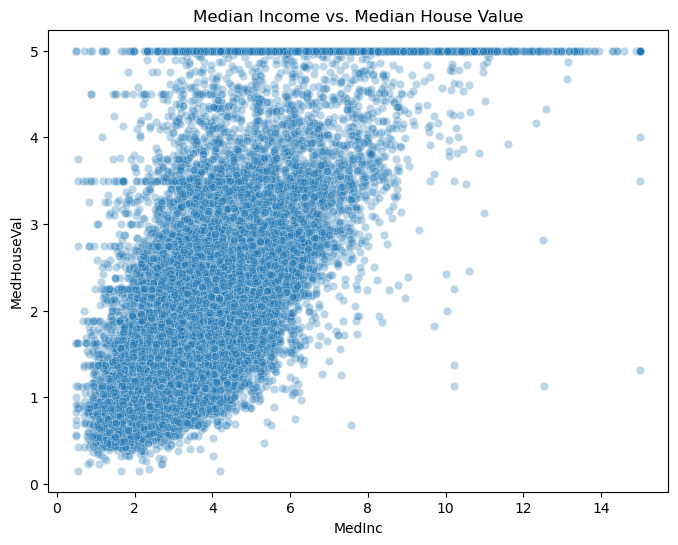

In [6]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='MedInc', y='MedHouseVal', data=df, alpha=0.3)
plt.title('Median Income vs. Median House Value')
plt.show()


In [7]:
# the dataset is capped at $500,000 

In [8]:
#splitting features and target
X = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"]


In [9]:
#train-test split(80-20)
from sklearn.model_selection import train_test_split

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)


In [10]:
# training the base descision tree regressor
from sklearn.tree import DecisionTreeRegressor

# Initialize base model (no max_depth )
reg = DecisionTreeRegressor(random_state=42)

# Train it
reg.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [11]:
# Predict and Evaluating on Train and Test Sets
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np


y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

# Evaluation metrics
print("Train R²:", r2_score(y_train, y_train_pred))
print("Test R² :", r2_score(y_test, y_test_pred))

print("\nTest MAE :", mean_absolute_error(y_test, y_test_pred))
print("Test MSE :", mean_squared_error(y_test, y_test_pred))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))


Train R²: 1.0
Test R² : 0.622075845135081

Test MAE : 0.45467918846899225
Test MSE : 0.495235205629094
Test RMSE: 0.7037294974840077


In [12]:
# Train R² = 1.0 and Test R² = 0.6. 
#38% gap so  model memorized training data

In [13]:
#hyper_parameter-tuning or pre-pruning
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'max_depth': [3, 4,5,6, 7, 8,10, None],
    'min_samples_split': [2, 4,5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [14]:
grid = GridSearchCV(DecisionTreeRegressor(random_state=42),
                    param_grid,
                    cv=5,
                    scoring='r2',
                    n_jobs=-1)


In [15]:
grid.fit(X_train, y_train)
grid.best_params_


{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}

In [16]:
#geting thebest model and evaluating scores
best_tree=grid.best_estimator_

#predicting with best model 
y_pred_best=best_tree.predict(X_test)

In [17]:
# Evaluation
print("Best Test R² :", r2_score(y_test, y_pred_best))
print("Best Test MAE:", mean_absolute_error(y_test, y_pred_best))
print("Best Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_best)))

Best Test R² : 0.6883380738855668
Best Test MAE: 0.4311152226926481
Best Test RMSE: 0.6390654005312799


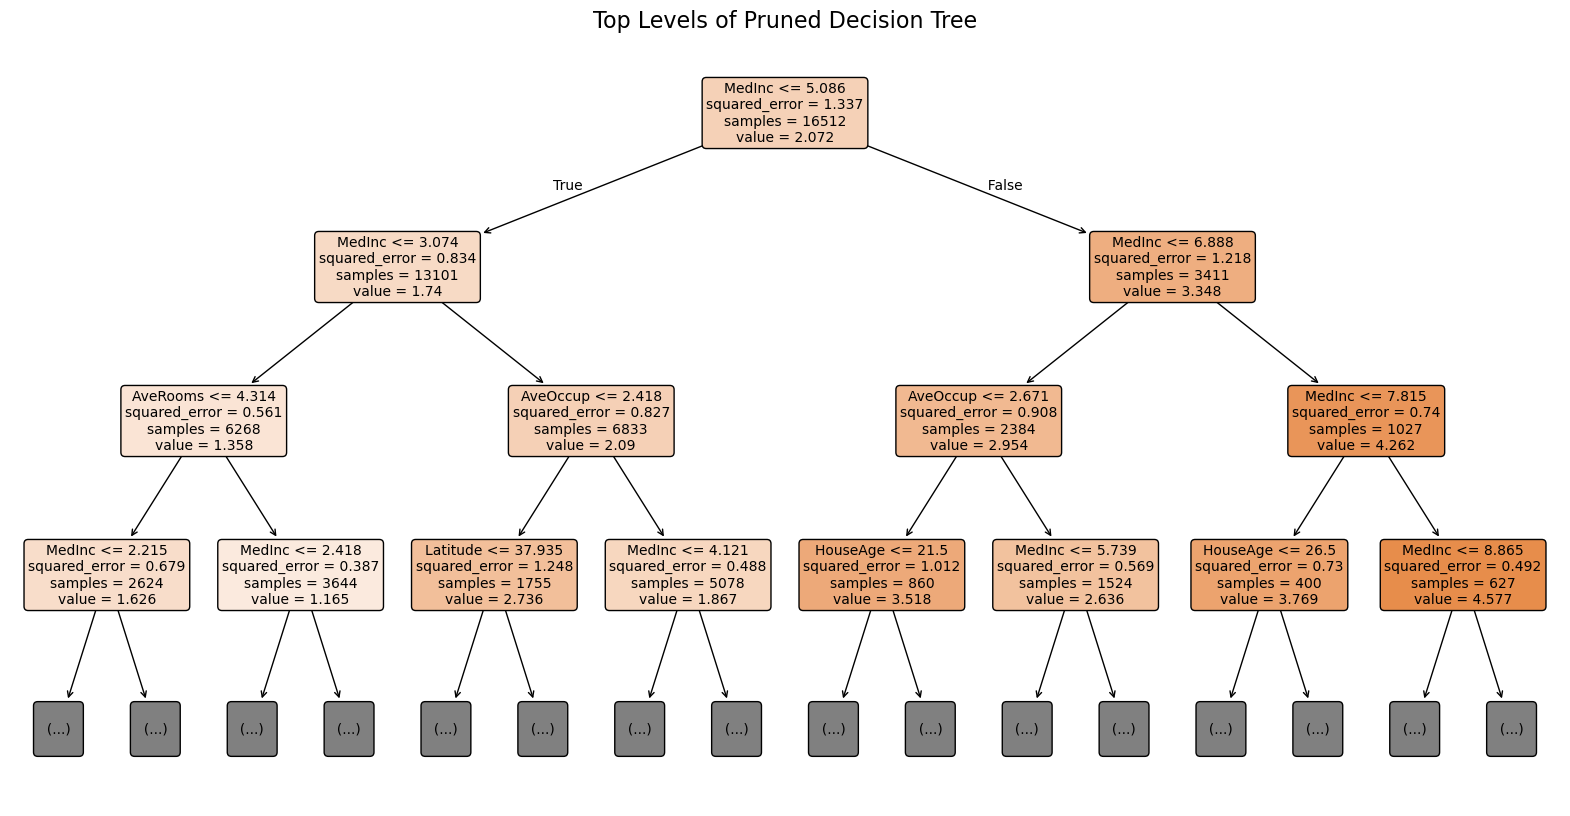

In [18]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(best_tree, 
          filled=True, 
          feature_names=X.columns, 
          rounded=True, 
          max_depth=3,   # top 3 levels for clarity
          fontsize=10)
plt.title("Pruned Decision Tree", fontsize=16)
plt.show()


In [26]:
importances=best_tree.feature_importances_
feat_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.round(importances, 3)
})
feat_importance_df = feat_importance_df.sort_values(by='Importance', ascending=False)

feat_importance_df



,Feature,Importance
0,MedInc,0.617
5,AveOccup,0.131
6,Latitude,0.079
7,Longitude,0.065
1,HouseAge,0.045
2,AveRooms,0.038
4,Population,0.013
3,AveBedrms,0.012


In [22]:
#conclusion

#MedInc is the most powerful predictor of house value
#AveOccup Higher price (but after income).

In [28]:
import joblib

# Save the tuned model
joblib.dump(best_tree, "decision_tree_regressor.pkl")


['decision_tree_regressor.pkl']